Packages

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.model_selection import train_test_split

Importing Data

In [5]:
#Change the file path to where you are keeping the data on your computer
filepath = "/Users/rohiniiyengar/Documents/Capstone/JD.com data/"

#df = pd.read_csv('file_path.csv', index_col=0) # How to import CSV Files
sku_data = pd.read_csv(filepath + 'JD_sku_data.csv', index_col=0)

users_data = pd.read_csv(filepath + 'JD_user_data.csv', index_col=0)

clicks_data = pd.read_csv(filepath + 'JD_click_data.csv', index_col=0)

orders_data = pd.read_csv(filepath + 'JD_order_data.csv', index_col=0)

delivery_data = pd.read_csv(filepath + 'JD_delivery_data.csv', index_col=0)

inventory_data = pd.read_csv(filepath + 'JD_inventory_data.csv', index_col=0)

network_data = pd.read_csv(filepath + 'JD_network_data.csv', index_col=0)

brand_sales_data = pd.read_csv(filepath + 'JD_sales_by_brand.csv', index_col=0)

#df = pd.read_excel('file_path.xlsx', sheet_name='SheetName') # How to import Excel Sheets
users_march = pd.read_excel(filepath + 'JD_March_2018_data.xlsx', sheet_name='User', index_col=0)

sku_march = pd.read_excel(filepath + 'JD_March_2018_data.xlsx', sheet_name='SKU', index_col=0)

order_march = pd.read_excel(filepath + 'JD_March_2018_data.xlsx', sheet_name='Order', index_col=0)

inventory_data = pd.read_excel(filepath + 'JD_March_2018_data.xlsx', sheet_name='Inventory', index_col=0)

delivery_data = pd.read_excel(filepath + 'JD_March_2018_data.xlsx', sheet_name='Delivery', index_col=0)

network_data = pd.read_excel(filepath + 'JD_March_2018_data.xlsx', sheet_name='Network', index_col=0)

In [6]:
order_march = pd.read_excel(filepath + 'JD_March_2018_data.xlsx', sheet_name='Order')

In [7]:
order_march.head(5)

order_ID     user_ID      sku_ID order_date          order_time  \
0  d0cf5cc6db  0abe9ef2ce  581d5b54c1 2018-03-01 2018-03-01 17:14:25   
1  7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
2  f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
3  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
4  d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   

   quantity  type promise  original_unit_price  final_unit_price  \
0         1     2       -                 89.0              79.0   
1         1     1       2                 99.9              53.9   
2         1     1       2                 78.0              58.5   
3         1     1       2                 61.0              35.0   
4         1     1       1                 78.0              53.0   

   direct_discount_per_unit  quantity_discount_per_unit  \
0                       0.0                        10.0   
1                       5.0                        41.0   
2                      19.5                         0.0   
3                       0.0                        26.0   
4                      19.0                         0.0   

   bundle_discount_per_unit  coupon_discount_per_unit  gift_item  dc_ori  \
0                       0.0                       0.0          0       4   
1                       0.0                       0.0          0      28   
2                       0.0                       0.0          0      28   
3                       0.0                       0.0          0       4   
4                       0.0                       6.0          0       3   

   dc_des  
0      28  
1      28  
2      28  
3      28  
4      16

In [8]:
# Assuming your DataFrame is called "order_march" and the date column is "order_date"
order_march['order_date'] = pd.to_datetime(order_march['order_date'])

In [9]:
# Assuming you have already loaded the 'order_march' DataFrame from the Excel file and converted 'order_date' to datetime format

# Filter data for March 2018 only
march_data = order_march[(order_march['order_date'] >= '2018-03-01') & (order_march['order_date'] <= '2018-03-31')]

# Group data by date and sum the quantities for each day
daily_demand = march_data.groupby('order_date')['quantity'].sum().reset_index()

# Extract month and day to prepare for the regression
daily_demand['month'] = daily_demand['order_date'].dt.month
daily_demand['day'] = daily_demand['order_date'].dt.day

# Separate independent variables (X) and dependent variable (y)
X = daily_demand[['month', 'day']]
y = daily_demand['quantity']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Forecasting for April 2018
# Generate dates for April 2018
start_date = datetime(2018, 4, 1)
end_date = datetime(2018, 4, 30)
april_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Extract month and day for April
april_data = pd.DataFrame({'month': april_dates.month, 'day': april_dates.day})

# Make predictions for April
april_forecast = model.predict(april_data)

# Create a DataFrame with the forecasted dates and quantities
forecast_df = pd.DataFrame({'order_date': april_dates, 'quantity_forecast': april_forecast})

print(forecast_df)


   order_date  quantity_forecast
0  2018-04-01       23979.016129
1  2018-04-02       23819.458065
2  2018-04-03       23659.900000
3  2018-04-04       23500.341935
4  2018-04-05       23340.783871
5  2018-04-06       23181.225806
6  2018-04-07       23021.667742
7  2018-04-08       22862.109677
8  2018-04-09       22702.551613
9  2018-04-10       22542.993548
10 2018-04-11       22383.435484
11 2018-04-12       22223.877419
12 2018-04-13       22064.319355
13 2018-04-14       21904.761290
14 2018-04-15       21745.203226
15 2018-04-16       21585.645161
16 2018-04-17       21426.087097
17 2018-04-18       21266.529032
18 2018-04-19       21106.970968
19 2018-04-20       20947.412903
20 2018-04-21       20787.854839
21 2018-04-22       20628.296774
22 2018-04-23       20468.738710
23 2018-04-24       20309.180645
24 2018-04-25       20149.622581
25 2018-04-26       19990.064516
26 2018-04-27       19830.506452
27 2018-04-28       19670.948387
28 2018-04-29       19511.390323
29 2018-04

In [10]:
import statsmodels.api as sm
# Add a constant term to the X matrix for the intercept
X = sm.add_constant(X)

# Fit the linear regression model using statsmodels
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.205
Date:                Sat, 22 Jul 2023   Prob (F-statistic):              0.281
Time:                        13:22:15   Log-Likelihood:                -318.45
No. Observations:                  31   AIC:                             640.9
Df Residuals:                      29   BIC:                             643.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month       8046.1914    888.049      9.061      0.0

Second Model: Addding Type

In [11]:
import pandas as pd
import statsmodels.api as sm
from datetime import datetime

# Assuming you have already loaded the 'order_march' DataFrame from the Excel file and converted 'order_date' to datetime format

# Group data by date and type and sum the quantities for each day and type
daily_demand = order_march.groupby(['order_date', 'type'])['quantity'].sum().reset_index()

# Extract month and day to prepare for the regression
daily_demand['month'] = daily_demand['order_date'].dt.month
daily_demand['day'] = daily_demand['order_date'].dt.day

# Create binary 'type_binary' variable (1 for type == 1, 0 for type == 2)
daily_demand['type_binary'] = (daily_demand['type'] == 1).astype(int)

# Separate independent variables (X) and dependent variable (y)
X = daily_demand[['month', 'day', 'type_binary']]
y = daily_demand['quantity']

# Add a constant term to the X matrix for the intercept
X = sm.add_constant(X)

# Fit the linear regression model using statsmodels
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.7402
Date:                Sat, 22 Jul 2023   Prob (F-statistic):              0.481
Time:                        13:22:15   Log-Likelihood:                -610.77
No. Observations:                  62   AIC:                             1228.
Df Residuals:                      59   BIC:                             1234.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
month        3975.9935    454.446      8.749      

In [12]:
daily_demand.head(5)

order_date  type  quantity  month  day  type_binary
0 2018-03-01     1     37254      3    1            1
1 2018-03-01     2     10741      3    1            0
2 2018-03-02     1     12647      3    2            1
3 2018-03-02     2      8067      3    2            0
4 2018-03-03     1     14287      3    3            1

In [13]:
import pandas as pd
import statsmodels.api as sm
from datetime import datetime

# Assuming you have already loaded the 'order_march' DataFrame from the Excel file and converted 'order_date' to datetime format

# Group data by date and type and sum the quantities for each day and type
daily_demand = order_march.groupby(['order_date', 'type'])['quantity'].sum().reset_index()

# Extract month and day to prepare for the regression
daily_demand['month'] = daily_demand['order_date'].dt.month
daily_demand['day'] = daily_demand['order_date'].dt.day

# Create binary 'type_binary' variable (1 for type == 1, 0 for type == 2)
daily_demand['type_binary'] = (daily_demand['type'] == 1).astype(int)

# Separate independent variables (X) and dependent variable (y)
X = daily_demand[['day', 'type_binary']]
y = daily_demand['quantity']

# Add a constant term to the X matrix for the intercept
X = sm.add_constant(X)

# Fit the linear regression model using statsmodels
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.7402
Date:                Sat, 22 Jul 2023   Prob (F-statistic):              0.481
Time:                        13:22:16   Log-Likelihood:                -610.77
No. Observations:                  62   AIC:                             1228.
Df Residuals:                      59   BIC:                             1234.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.193e+04   1363.337      8.749      

## Moving Average

In [14]:
import pandas as pd
from datetime import datetime, timedelta

# Assuming you have already loaded the 'order_march' DataFrame from the Excel file and converted 'order_date' to datetime format

# Filter data for March 2018 only
march_data = order_march[(order_march['order_date'] >= '2018-03-01') & (order_march['order_date'] <= '2018-03-31')]

# Group data by date and sum the quantities for each day
daily_demand = march_data.groupby('order_date')['quantity'].sum().reset_index()

# Extract month and day to prepare for the forecast
daily_demand['month'] = daily_demand['order_date'].dt.month
daily_demand['day'] = daily_demand['order_date'].dt.day

# Create a DataFrame for April 2018 dates
start_date = datetime(2018, 4, 1)
end_date = datetime(2018, 4, 30)
april_dates = pd.date_range(start=start_date, end=end_date, freq='D')
april_data = pd.DataFrame({'order_date': april_dates})

# Initialize a list to store the forecasted quantities
forecasted_quantities = []

# Define the window size for the moving average
window_size = 7  # Adjust this value based on your preference or historical data patterns

# Calculate the moving average forecast for each day in April
for date in april_dates:
    start_window = date - timedelta(days=window_size - 1)
    end_window = date + timedelta(days=1)  # We include the current day in the average

    # Filter the data for the current window
    window_data = daily_demand[(daily_demand['order_date'] >= start_window) & (daily_demand['order_date'] < end_window)]

    # Calculate the moving average
    moving_avg = window_data['quantity'].mean()

    # Append the forecasted quantity to the list
    forecasted_quantities.append(moving_avg)

# Add the forecasted quantities to the April DataFrame
april_data['quantity_forecast'] = forecasted_quantities

print(april_data)


   order_date  quantity_forecast
0  2018-04-01            24782.0
1  2018-04-02            25187.4
2  2018-04-03            25220.5
3  2018-04-04            23771.0
4  2018-04-05            23242.0
5  2018-04-06            22865.0
6  2018-04-07                NaN
7  2018-04-08                NaN
8  2018-04-09                NaN
9  2018-04-10                NaN
10 2018-04-11                NaN
11 2018-04-12                NaN
12 2018-04-13                NaN
13 2018-04-14                NaN
14 2018-04-15                NaN
15 2018-04-16                NaN
16 2018-04-17                NaN
17 2018-04-18                NaN
18 2018-04-19                NaN
19 2018-04-20                NaN
20 2018-04-21                NaN
21 2018-04-22                NaN
22 2018-04-23                NaN
23 2018-04-24                NaN
24 2018-04-25                NaN
25 2018-04-26                NaN
26 2018-04-27                NaN
27 2018-04-28                NaN
28 2018-04-29                NaN
29 2018-04

## Exponential smoothing

In [15]:
import pandas as pd
import statsmodels.api as sm
from datetime import datetime

# Assuming you have already loaded the 'order_march' DataFrame from the Excel file and converted 'order_date' to datetime format

# Filter data for March 2018 only
march_data = order_march[(order_march['order_date'] >= '2018-03-01') & (order_march['order_date'] <= '2018-03-31')]

# Group data by date and sum the quantities for each day
daily_demand = march_data.groupby('order_date')['quantity'].sum().reset_index()

# Extract month and day to prepare for the forecast
daily_demand['month'] = daily_demand['order_date'].dt.month
daily_demand['day'] = daily_demand['order_date'].dt.day

# Create a DataFrame for April 2018 dates
start_date = datetime(2018, 4, 1)
end_date = datetime(2018, 4, 30)
april_dates = pd.date_range(start=start_date, end=end_date, freq='D')
april_data = pd.DataFrame({'order_date': april_dates})

# Fit the exponential smoothing model using Holt-Winters method
try:
    model = sm.tsa.ExponentialSmoothing(daily_demand['quantity'], trend='add', seasonal='add', seasonal_periods=7)
    fitted_model = model.fit()
except sm.tools.sm_exceptions.ConvergenceWarning:
    # Try different parameters if the model fails to converge
    model = sm.tsa.ExponentialSmoothing(daily_demand['quantity'], trend='add', seasonal=None)
    fitted_model = model.fit()

# Forecast the demand for April 2018
april_forecast = fitted_model.forecast(len(april_dates))

# Add the forecasted quantities to the April DataFrame
april_data['quantity_forecast'] = april_forecast

print(april_data)


   order_date  quantity_forecast
0  2018-04-01                NaN
1  2018-04-02                NaN
2  2018-04-03                NaN
3  2018-04-04                NaN
4  2018-04-05                NaN
5  2018-04-06                NaN
6  2018-04-07                NaN
7  2018-04-08                NaN
8  2018-04-09                NaN
9  2018-04-10                NaN
10 2018-04-11                NaN
11 2018-04-12                NaN
12 2018-04-13                NaN
13 2018-04-14                NaN
14 2018-04-15                NaN
15 2018-04-16                NaN
16 2018-04-17                NaN
17 2018-04-18                NaN
18 2018-04-19                NaN
19 2018-04-20                NaN
20 2018-04-21                NaN
21 2018-04-22                NaN
22 2018-04-23                NaN
23 2018-04-24                NaN
24 2018-04-25                NaN
25 2018-04-26                NaN
26 2018-04-27                NaN
27 2018-04-28                NaN
28 2018-04-29                NaN
29 2018-04

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Simple Average

In [16]:
import pandas as pd
from datetime import datetime

# Assuming you have already loaded the 'order_march' DataFrame from the Excel file and converted 'order_date' to datetime format

# Filter data for March 2018 only
march_data = order_march[(order_march['order_date'] >= '2018-03-01') & (order_march['order_date'] <= '2018-03-31')]

# Group data by date and sum the quantities for each day
daily_demand = march_data.groupby('order_date')['quantity'].sum().reset_index()

# Extract month and day to prepare for the forecast
daily_demand['month'] = daily_demand['order_date'].dt.month
daily_demand['day'] = daily_demand['order_date'].dt.day

# Create a DataFrame for April 2018 dates
start_date = datetime(2018, 4, 1)
end_date = datetime(2018, 4, 30)
april_dates = pd.date_range(start=start_date, end=end_date, freq='D')
april_data = pd.DataFrame({'order_date': april_dates})

# Calculate the simple average of daily demand in March
average_demand = daily_demand['quantity'].mean()

# Set the simple average as the forecast for April
april_data['quantity_forecast'] = average_demand

print(april_data)


   order_date  quantity_forecast
0  2018-04-01       21585.645161
1  2018-04-02       21585.645161
2  2018-04-03       21585.645161
3  2018-04-04       21585.645161
4  2018-04-05       21585.645161
5  2018-04-06       21585.645161
6  2018-04-07       21585.645161
7  2018-04-08       21585.645161
8  2018-04-09       21585.645161
9  2018-04-10       21585.645161
10 2018-04-11       21585.645161
11 2018-04-12       21585.645161
12 2018-04-13       21585.645161
13 2018-04-14       21585.645161
14 2018-04-15       21585.645161
15 2018-04-16       21585.645161
16 2018-04-17       21585.645161
17 2018-04-18       21585.645161
18 2018-04-19       21585.645161
19 2018-04-20       21585.645161
20 2018-04-21       21585.645161
21 2018-04-22       21585.645161
22 2018-04-23       21585.645161
23 2018-04-24       21585.645161
24 2018-04-25       21585.645161
25 2018-04-26       21585.645161
26 2018-04-27       21585.645161
27 2018-04-28       21585.645161
28 2018-04-29       21585.645161
29 2018-04

ARIMA

In [17]:
import pandas as pd
import statsmodels.api as sm
from datetime import datetime

# Assuming you have already loaded the 'order_march' DataFrame from the Excel file and converted 'order_date' to datetime format

# Filter data for March 2018 only
march_data = order_march[(order_march['order_date'] >= '2018-03-01') & (order_march['order_date'] <= '2018-03-31')]

# Group data by date and sum the quantities for each day
daily_demand = march_data.groupby('order_date')['quantity'].sum().reset_index()

# Extract month and day to prepare for the forecast
daily_demand['month'] = daily_demand['order_date'].dt.month
daily_demand['day'] = daily_demand['order_date'].dt.day

# Create a DataFrame for April 2018 dates
start_date = datetime(2018, 4, 1)
end_date = datetime(2018, 4, 30)
april_dates = pd.date_range(start=start_date, end=end_date, freq='D')
april_data = pd.DataFrame({'order_date': april_dates})

# Fit the ARIMA model
order = (2, 1, 1)  # (p, d, q) order of the ARIMA model
model = sm.tsa.ARIMA(daily_demand['quantity'], order=order)
fitted_model = model.fit()

# Forecast the demand for April 2018
april_forecast = fitted_model.forecast(len(april_dates))

# Add the forecasted quantities to the April DataFrame
april_data['quantity_forecast'] = april_forecast

print(april_data)


   order_date  quantity_forecast
0  2018-04-01                NaN
1  2018-04-02                NaN
2  2018-04-03                NaN
3  2018-04-04                NaN
4  2018-04-05                NaN
5  2018-04-06                NaN
6  2018-04-07                NaN
7  2018-04-08                NaN
8  2018-04-09                NaN
9  2018-04-10                NaN
10 2018-04-11                NaN
11 2018-04-12                NaN
12 2018-04-13                NaN
13 2018-04-14                NaN
14 2018-04-15                NaN
15 2018-04-16                NaN
16 2018-04-17                NaN
17 2018-04-18                NaN
18 2018-04-19                NaN
19 2018-04-20                NaN
20 2018-04-21                NaN
21 2018-04-22                NaN
22 2018-04-23                NaN
23 2018-04-24                NaN
24 2018-04-25                NaN
25 2018-04-26                NaN
26 2018-04-27                NaN
27 2018-04-28                NaN
28 2018-04-29                NaN
29 2018-04

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


facebook

In [18]:
pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.5/598.5 kB 675.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 4.7 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 3.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.0/362.0 kB 5.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 7.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=46f8f6576f21aa117cbeb74cb4492901acb8f9de3abdf93a06e19964946b71ad
  Stored in directory: /Users/rohiniiyengar/Library/Caches/pip/wheels/80/11/82/146513e81cf4efcc994780a5f4c25387d66894c4d139c62b74
Successfully built pymeeus
Failed to build fbprophet
  Running setup.py install for fbprophet ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for fbprophet did not run successfully.
  │ exit code: 1
  ╰─> [59 lines of output]
      running install
      /opt/anaconda3/lib/python3.7/site-packages/setuptools/command/install.py:37: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        setuptools.SetuptoolsDeprecationWarning,
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      Traceback (most

In [19]:
import pandas as pd
from datetime import datetime
from fbprophet import Prophet

# Assuming you have already loaded the 'order_march' DataFrame from the Excel file and converted 'order_date' to datetime format

# Filter data for March 2018 only
march_data = order_march[(order_march['order_date'] >= '2018-03-01') & (order_march['order_date'] <= '2018-03-31')]

# Group data by date and sum the quantities for each day
daily_demand = march_data.groupby('order_date')['quantity'].sum().reset_index()

# Rename columns as required by Prophet
daily_demand.rename(columns={'order_date': 'ds', 'quantity': 'y'}, inplace=True)

# Create a DataFrame for April 2018 dates
start_date = datetime(2018, 4, 1)
end_date = datetime(2018, 4, 30)
april_dates = pd.date_range(start=start_date, end=end_date, freq='D')
april_data = pd.DataFrame({'ds': april_dates})

# Fit the Prophet model
model = Prophet()
model.fit(daily_demand)

# Forecast the demand for April 2018
forecast = model.predict(april_data)

# Extract the forecasted quantities
april_forecast = forecast[['ds', 'yhat']].rename(columns={'yhat': 'quantity_forecast'})

print(april_forecast)


ModuleNotFoundError: No module named 'fbprophet'

Exponential smoothing Second Try

In [ ]:
import pandas as pd

# Assuming you have already loaded the 'order_march' DataFrame from the Excel file and converted 'order_date' to datetime format

# Filter data for March 2018 only
march_data = order_march[(order_march['order_date'] >= '2018-03-01') & (order_march['order_date'] <= '2018-03-31')]

# Group data by date and sum the quantities for each day
daily_demand = march_data.groupby('order_date')['quantity'].sum().reset_index()

# Set 'order_date' as the index
daily_demand.set_index('order_date', inplace=True)

# Choose an initial value for the forecast (e.g., the first observed value)
initial_forecast = daily_demand['quantity'].iloc[0]

# Set the smoothing factor (α)
alpha = 0.2

# Create a DataFrame for April 2018 dates
start_date = pd.to_datetime('2018-04-01')
end_date = pd.to_datetime('2018-04-30')
april_dates = pd.date_range(start=start_date, end=end_date, freq='D')
april_data = pd.DataFrame({'quantity_forecast': [None] * len(april_dates)}, index=april_dates)

# Perform one-step-ahead forecasts for April 2018
for date in april_dates:
    # Calculate the forecast for the next day using exponential smoothing
    forecast = alpha * daily_demand['quantity'].loc[date] + (1 - alpha) * initial_forecast
    april_data.at[date, 'quantity_forecast'] = forecast

    # Update the initial forecast for the next iteration
    initial_forecast = forecast

print(april_data)


## Time Series

In [ ]:
order_march.groupby('order_date')['quantity'].sum().reset_index()

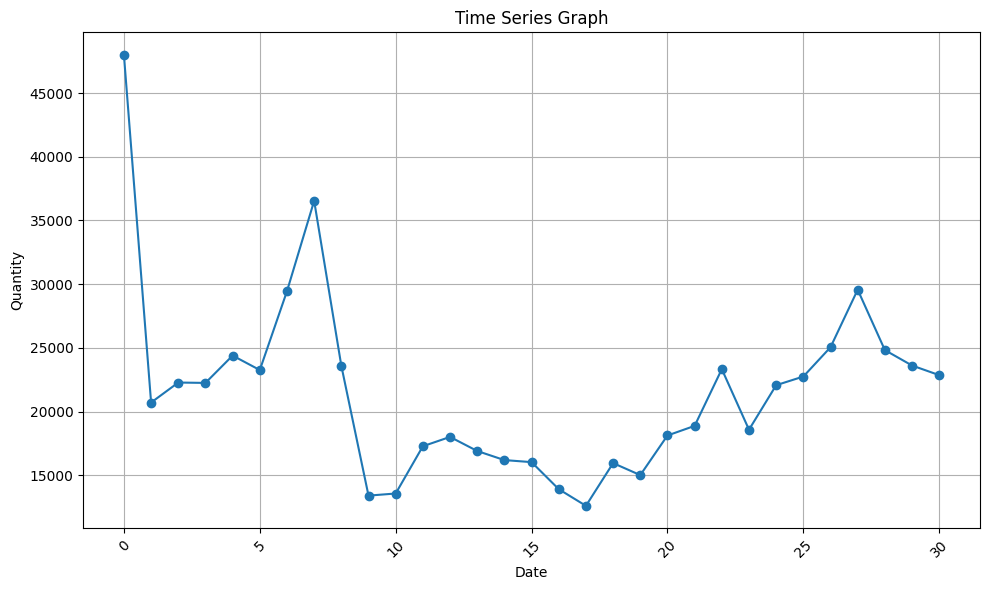

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate some sample time series data
# Replace this with your actual time series data
# In this example, we generate data for 10 time points (days)

# Group data by date and sum the quantities for each day
daily_demand = order_march.groupby('order_date')['quantity'].sum().reset_index()

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(daily_demand.index, daily_demand['quantity'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series Graph')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Users

In [ ]:
users_data.head()

In [23]:
user_orders = users_data.join(order_march.set_index('user_ID'), on="user_ID")

In [24]:
user_orders.groupby('first_order_month')['quantity'].sum().reset_index()

first_order_month  quantity
0             2003-12       1.0
1             2004-01       4.0
2             2004-02       1.0
3             2004-05       3.0
4             2004-07       3.0
..                ...       ...
164           2017-11   16997.0
165           2017-12   13233.0
166           2018-01   13816.0
167           2018-02   14064.0
168           2018-03   55010.0

[169 rows x 2 columns]

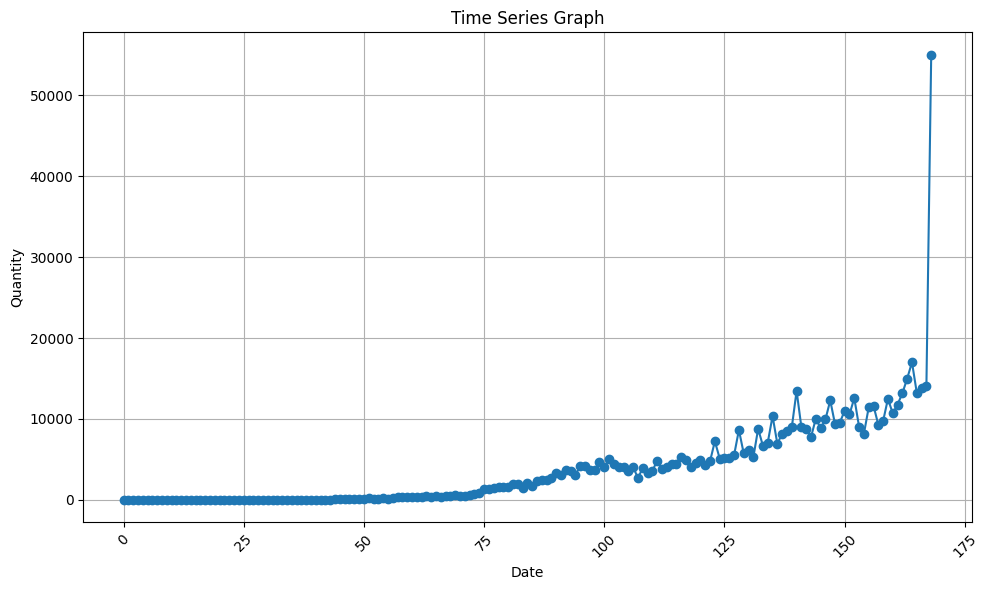

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate some sample time series data
# Replace this with your actual time series data
# In this example, we generate data for 10 time points (days)

# Group data by date and sum the quantities for each day
daily_demand = user_orders.groupby('first_order_month')['quantity'].sum().reset_index()

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(daily_demand.index, daily_demand['quantity'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series Graph')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Daily Demand

In [26]:
order_march.head()

order_ID     user_ID      sku_ID order_date          order_time  \
0  d0cf5cc6db  0abe9ef2ce  581d5b54c1 2018-03-01 2018-03-01 17:14:25   
1  7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
2  f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
3  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
4  d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   

   quantity  type promise  original_unit_price  final_unit_price  \
0         1     2       -                 89.0              79.0   
1         1     1       2                 99.9              53.9   
2         1     1       2                 78.0              58.5   
3         1     1       2                 61.0              35.0   
4         1     1       1                 78.0              53.0   

   direct_discount_per_unit  quantity_discount_per_unit  \
0                       0.0                        10.0   
1                       5.0                        41.0   
2                      19.5                         0.0   
3                       0.0                        26.0   
4                      19.0                         0.0   

   bundle_discount_per_unit  coupon_discount_per_unit  gift_item  dc_ori  \
0                       0.0                       0.0          0       4   
1                       0.0                       0.0          0      28   
2                       0.0                       0.0          0      28   
3                       0.0                       0.0          0       4   
4                       0.0                       6.0          0       3   

   dc_des  
0      28  
1      28  
2      28  
3      28  
4      16

In [27]:
# Group data by date and sum the quantities for each day
order_march['time_of_day'] = pd.to_datetime(order_march['order_time']).dt.strftime("%H")
order_march['time_of_day']

0         17
1         11
2         09
3         21
4         19
          ..
549984    01
549985    08
549986    13
549987    12
549988    18
Name: time_of_day, Length: 549989, dtype: object

In [28]:
# Group data by date and sum the quantities for each day
daily_demand = order_march.groupby('time_of_day')['quantity'].sum().reset_index()
daily_demand

time_of_day  quantity
0           00     19437
1           01      8254
2           02      3145
3           03      1884
4           04      1574
5           05      2087
6           06      5956
7           07     13330
8           08     24293
9           09     35647
10          10     50092
11          11     42778
12          12     38594
13          13     43991
14          14     44632
15          15     44973
16          16     40380
17          17     33633
18          18     27751
19          19     29116
20          20     36897
21          21     42390
22          22     45557
23          23     32764

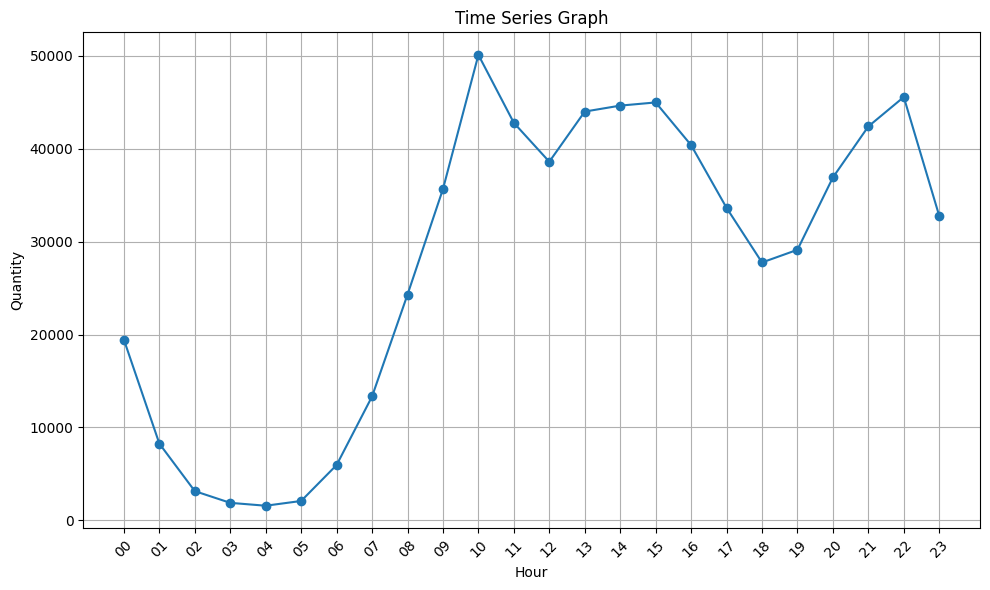

In [29]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(daily_demand['time_of_day'], daily_demand['quantity'], marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.title('Time Series Graph')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Weekend vs Weekday

In [120]:
order_march.head()

order_ID     user_ID      sku_ID order_date          order_time  \
0  d0cf5cc6db  0abe9ef2ce  581d5b54c1 2018-03-01 2018-03-01 17:14:25   
1  7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
2  f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
3  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
4  d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   

   quantity  type promise  original_unit_price  final_unit_price  \
0         1     2       -                 89.0              79.0   
1         1     1       2                 99.9              53.9   
2         1     1       2                 78.0              58.5   
3         1     1       2                 61.0              35.0   
4         1     1       1                 78.0              53.0   

   direct_discount_per_unit  quantity_discount_per_unit  \
0                       0.0                        10.0   
1                       5.0                        41.0   
2                      19.5                         0.0   
3                       0.0                        26.0   
4                      19.0                         0.0   

   bundle_discount_per_unit  coupon_discount_per_unit  gift_item  dc_ori  \
0                       0.0                       0.0          0       4   
1                       0.0                       0.0          0      28   
2                       0.0                       0.0          0      28   
3                       0.0                       0.0          0       4   
4                       0.0                       6.0          0       3   

   dc_des time_of_day  weekend  
0      28          17  weekday  
1      28          11  weekday  
2      28          09  weekday  
3      28          21  weekday  
4      16          19  weekday

In [117]:
import calendar

def days_in_month_to_days_of_week(year, month):
    # Get the matrix of days in the month
    month_matrix = calendar.monthcalendar(year, month)
    
    # Map numeric representation of days to their names
    day_names = list(calendar.day_name)
    
    # Create a dictionary to store the mapping of days to their respective days of the week
    days_of_week = {}
    for week in month_matrix:
        for day_index, day_num in enumerate(week):
            if day_num != 0:
                day_name = day_names[day_index]
                days_of_week[day_num] = day_name
    
    return days_of_week

In [118]:
mapping = days_in_month_to_days_of_week(2018, 3)

{1: 'Thursday',
 2: 'Friday',
 3: 'Saturday',
 4: 'Sunday',
 5: 'Monday',
 6: 'Tuesday',
 7: 'Wednesday',
 8: 'Thursday',
 9: 'Friday',
 10: 'Saturday',
 11: 'Sunday',
 12: 'Monday',
 13: 'Tuesday',
 14: 'Wednesday',
 15: 'Thursday',
 16: 'Friday',
 17: 'Saturday',
 18: 'Sunday',
 19: 'Monday',
 20: 'Tuesday',
 21: 'Wednesday',
 22: 'Thursday',
 23: 'Friday',
 24: 'Saturday',
 25: 'Sunday',
 26: 'Monday',
 27: 'Tuesday',
 28: 'Wednesday',
 29: 'Thursday',
 30: 'Friday',
 31: 'Saturday'}

In [254]:
weekend = ['2018-03-03', '2018-03-04', '2018-03-10', '2018-03-11', '2018-03-17', '2018-03-18', '2018-03-24', '2018-03-25', '2018-03-31']
order_march['weekend'] = [i.strftime('%A') for i in order_march['order_date']]
order_march.head()

order_ID     user_ID      sku_ID order_date          order_time  \
0  d0cf5cc6db  0abe9ef2ce  581d5b54c1 2018-03-01 2018-03-01 17:14:25   
1  7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
2  f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
3  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
4  d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   

   quantity  type promise  original_unit_price  final_unit_price  \
0         1     2       -                 89.0              79.0   
1         1     1       2                 99.9              53.9   
2         1     1       2                 78.0              58.5   
3         1     1       2                 61.0              35.0   
4         1     1       1                 78.0              53.0   

   direct_discount_per_unit  quantity_discount_per_unit  \
0                       0.0                        10.0   
1                       5.0                        41.0   
2                      19.5                         0.0   
3                       0.0                        26.0   
4                      19.0                         0.0   

   bundle_discount_per_unit  coupon_discount_per_unit  gift_item  dc_ori  \
0                       0.0                       0.0          0       4   
1                       0.0                       0.0          0      28   
2                       0.0                       0.0          0      28   
3                       0.0                       0.0          0       4   
4                       0.0                       6.0          0       3   

   dc_des time_of_day   weekend  sales  
0      28          17  Thursday   79.0  
1      28          11  Thursday   53.9  
2      28          09  Thursday   58.5  
3      28          21  Thursday   35.0  
4      16          19  Thursday   53.0

In [255]:
daily_demand = order_march.groupby('weekend')['gift_item'].sum().reset_index()


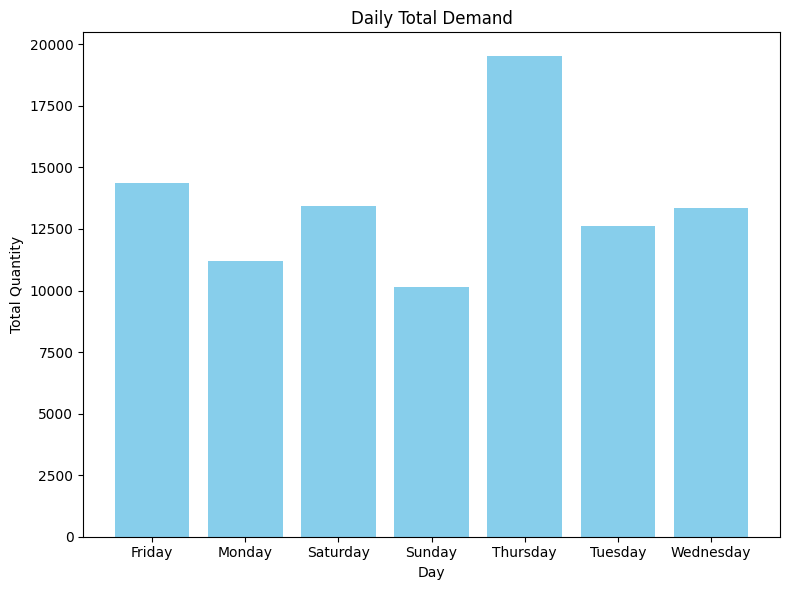

In [256]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(daily_demand['weekend'], daily_demand['gift_item'], color='skyblue')

# Customize the plot
plt.xlabel('Day')
plt.ylabel('Total Quantity')
plt.title('Daily Total Demand')
plt.tight_layout()

# Show the plot
plt.show()

## Discounts by Day of week

In [209]:
# Group data by date and sum the quantities for each day
discounts = order_march.groupby('weekend')['coupon_discount_per_unit', 'quantity_discount_per_unit', 'direct_discount_per_unit', 'bundle_discount_per_unit'].mean().reset_index()
discounts['weekdays_sorted'] = pd.Categorical(
    discounts['weekend'], 
    categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    ordered=True)
discounts = discounts.sort_values('weekdays_sorted')
discounts

weekend  coupon_discount_per_unit  quantity_discount_per_unit  \
3     Sunday                  1.956742                    6.976045   
1     Monday                  2.441065                    6.668247   
5    Tuesday                  2.391369                    6.216034   
6  Wednesday                  2.498491                    6.834347   
4   Thursday                  4.330668                   10.778601   
0     Friday                  3.216566                    9.251756   
2   Saturday                  2.568906                    6.017233   

   direct_discount_per_unit  bundle_discount_per_unit weekdays_sorted  
3                 20.142137                  0.434856          Sunday  
1                 18.887539                  0.485860          Monday  
5                 19.898422                  0.619292         Tuesday  
6                 20.374298                  0.731514       Wednesday  
4                 19.935656                  0.834970        Thursday  
0                 18.895210                  0.600041          Friday  
2                 20.749755                  0.508624        Saturday

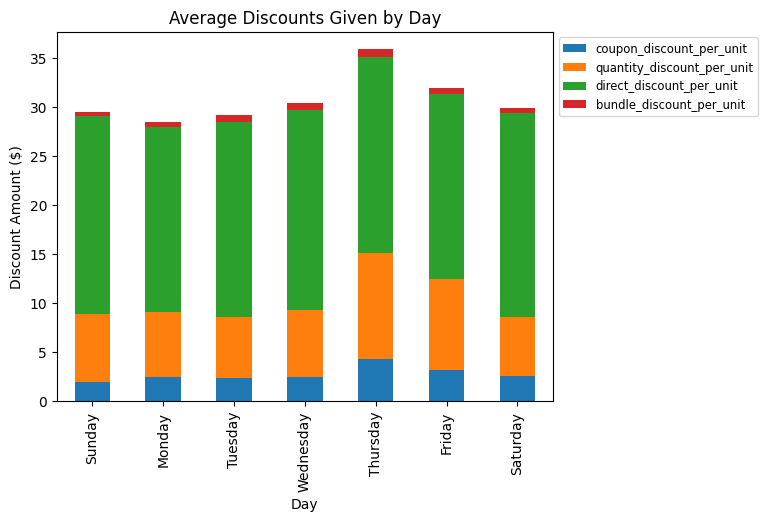

In [210]:
ax = discounts.plot.bar(x='weekend', stacked=True)
ax.set_title('Average Discounts Given by Day')
ax.set_ylabel('Discount Amount ($)')
ax.set_xlabel('Day')
ax.legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small')

## Discounts by Day of Week Regression

In [198]:
# Separate independent variables (X) and dependent variable (y)
X = discounts[['direct_discount_per_unit', 'bundle_discount_per_unit']]
y = discounts['quantity']

# 1. Create the LogisticRegression model object below and assign to variable 'model'

model = LinearRegression()

# 2. Fit the model to the training data below

model.fit(X, y)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.9776310258662884
Coefficients: 
 [-0.04388634  0.17531946]
                                 OLS Regression Results                                
Dep. Variable:               quantity   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              830.7
Date:                Sun, 23 Jul 2023   Prob (F-statistic):                    4.93e-07
Time:                        12:48:14   Log-Likelihood:                          9.0469
No. Observations:                   7   AIC:                                     -14.09
Df Residuals:                       5   BIC:                                     -14.20
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [207]:
from scipy.stats.stats import pearsonr

corr = discounts.corr(method ='pearson')
corr

coupon_discount_per_unit  \
coupon_discount_per_unit                    1.000000   
quantity_discount_per_unit                  0.905137   
direct_discount_per_unit                   -0.167029   
bundle_discount_per_unit                    0.770436   
quantity                                    0.641792   

                            quantity_discount_per_unit  \
coupon_discount_per_unit                      0.905137   
quantity_discount_per_unit                    1.000000   
direct_discount_per_unit                     -0.327956   
bundle_discount_per_unit                      0.640320   
quantity                                      0.669068   

                            direct_discount_per_unit  \
coupon_discount_per_unit                   -0.167029   
quantity_discount_per_unit                 -0.327956   
direct_discount_per_unit                    1.000000   
bundle_discount_per_unit                    0.114820   
quantity                                   -0.710767   

                            bundle_discount_per_unit  quantity  
coupon_discount_per_unit                    0.770436  0.641792  
quantity_discount_per_unit                  0.640320  0.669068  
direct_discount_per_unit                    0.114820 -0.710767  
bundle_discount_per_unit                    1.000000  0.537705  
quantity                                    0.537705  1.000000

## Demand by Location

In [33]:
order_march.head()

order_ID     user_ID      sku_ID order_date          order_time  \
0  d0cf5cc6db  0abe9ef2ce  581d5b54c1 2018-03-01 2018-03-01 17:14:25   
1  7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
2  f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
3  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
4  d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   

   quantity  type promise  original_unit_price  final_unit_price  \
0         1     2       -                 89.0              79.0   
1         1     1       2                 99.9              53.9   
2         1     1       2                 78.0              58.5   
3         1     1       2                 61.0              35.0   
4         1     1       1                 78.0              53.0   

   direct_discount_per_unit  quantity_discount_per_unit  \
0                       0.0                        10.0   
1                       5.0                        41.0   
2                      19.5                         0.0   
3                       0.0                        26.0   
4                      19.0                         0.0   

   bundle_discount_per_unit  coupon_discount_per_unit  gift_item  dc_ori  \
0                       0.0                       0.0          0       4   
1                       0.0                       0.0          0      28   
2                       0.0                       0.0          0      28   
3                       0.0                       0.0          0       4   
4                       0.0                       6.0          0       3   

   dc_des time_of_day  weekend  
0      28          17  weekday  
1      28          11  weekday  
2      28          09  weekday  
3      28          21  weekday  
4      16          19  weekday

In [34]:
warehouse_demand = order_march.groupby('dc_ori')['quantity'].sum().reset_index()
warehouse_demand

dc_ori  quantity
0        1       581
1        2     98873
2        3     17184
3        4     70471
4        5    135223
5        6      5314
6        7     62881
7        8       320
8        9    108187
9       10     29582
10      11       249
11      12        87
12      13       280
13      14       155
14      15       345
15      19       269
16      20      6712
17      21       287
18      24     44128
19      25      1174
20      26      5944
21      27      2775
22      28      5048
23      31      5973
24      32      2178
25      33      2972
26      34      1676
27      35      1553
28      36      2580
29      37      1374
30      38       844
31      39      2698
32      40      1589
33      41      2243
34      42      3829
35      43      3077
36      44      2612
37      45      1596
38      46      1919
39      47       949
40      50      2241
41      51       728
42      52       886
43      53      2300
44      54       489
45      55      1288
46      56      2255
47      57       401
48      58      6896
49      59     10327
50      61       777
51      63      1008
52      64      1125
53      65      2028
54      66       147
55      67       528

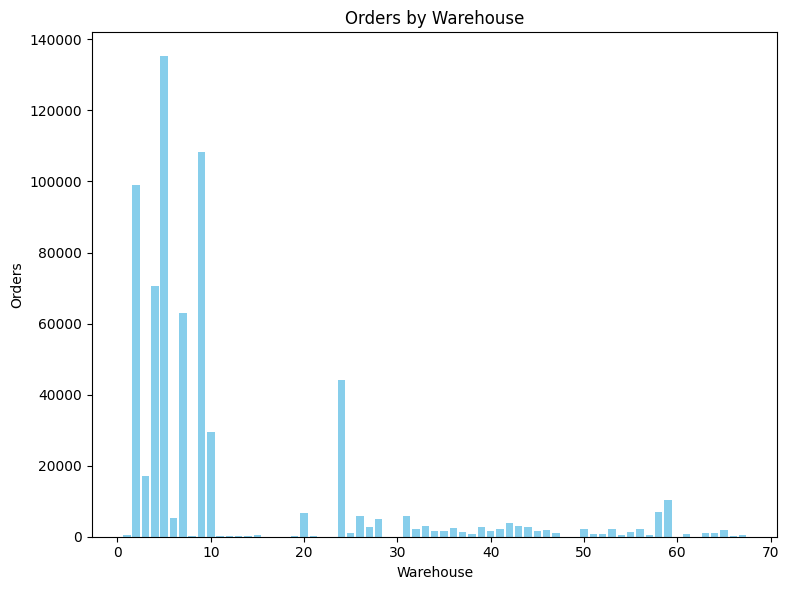

In [35]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(warehouse_demand['dc_ori'], warehouse_demand['quantity'], color='skyblue')

# Customize the plot
plt.xlabel('Warehouse')
plt.ylabel('Orders')
plt.title('Orders by Warehouse')
plt.tight_layout()

# Show the plot
plt.show()

## Join Users and Orders to get City Level Demand

In [36]:
orders_data.set_index('user_ID').head()

sku_ID  order_date             order_time  quantity  type  \
user_ID                                                                     
0abe9ef2ce  581d5b54c1  2018-03-01  2018-03-01 17:14:25.0         1     2   
33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0         1     1   
4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0         1     1   
b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0         1     1   
4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0         1     1   

           promise  original_unit_price  final_unit_price  \
user_ID                                                     
0abe9ef2ce       -                 89.0              79.0   
33a9e56257       2                 99.9              53.9   
4ea3cf408f       2                 78.0              58.5   
b87cb736cb       2                 61.0              35.0   
4829223b6f       1                 78.0              53.0   

            direct_discount_per_unit  quantity_discount_per_unit  \
user_ID                                                            
0abe9ef2ce                       0.0                        10.0   
33a9e56257                       5.0                        41.0   
4ea3cf408f                      19.5                         0.0   
b87cb736cb                       0.0                        26.0   
4829223b6f                      19.0                         0.0   

            bundle_discount_per_unit  coupon_discount_per_unit  gift_item  \
user_ID                                                                     
0abe9ef2ce                       0.0                       0.0          0   
33a9e56257                       0.0                       0.0          0   
4ea3cf408f                       0.0                       0.0          0   
b87cb736cb                       0.0                       0.0          0   
4829223b6f                       0.0                       6.0          0   

            dc_ori  dc_des  
user_ID                     
0abe9ef2ce       4      28  
33a9e56257      28      28  
4ea3cf408f      28      28  
b87cb736cb       4      28  
4829223b6f       3      16

In [108]:
user_orders = users_data.join(orders_data.set_index('user_ID'), on="user_ID", how="left")
user_orders.head()

user_level first_order_month  plus gender    age marital_status  \
user_ID                                                                       
000089d6a6           1           2017-08     0      F  26-35              S   
0000babd1f           1           2018-03     0      U      U              U   
0000bc018b           3           2016-06     0      F   >=56              M   
0000d0e5ab           3           2014-06     0      M  26-35              M   
0000dce472           3           2012-08     1      U      U              U   

            education  city_level  purchase_power      sku_ID  ... promise  \
user_ID                                                        ...           
000089d6a6          3           4               3  e99eb7d131  ...       -   
0000babd1f         -1          -1              -1  7185ef8e8c  ...       -   
0000bc018b          3           2               3  fa823767ca  ...       1   
0000d0e5ab          3           2               2  2523d051fd  ...       1   
0000dce472         -1          -1              -1  f0e625dda4  ...       2   

           original_unit_price  final_unit_price  direct_discount_per_unit  \
user_ID                                                                      
000089d6a6               330.0             215.0                     115.0   
0000babd1f                39.0              39.0                       0.0   
0000bc018b                79.0              79.0                       0.0   
0000d0e5ab               298.0             228.0                      70.0   
0000dce472               166.0             111.5                       7.0   

           quantity_discount_per_unit  bundle_discount_per_unit  \
user_ID                                                           
000089d6a6                        0.0                       0.0   
0000babd1f                        0.0                       0.0   
0000bc018b                        0.0                       0.0   
0000d0e5ab                        0.0                       0.0   
0000dce472                       47.5                       0.0   

            coupon_discount_per_unit  gift_item  dc_ori  dc_des  
user_ID                                                          
000089d6a6                       0.0        0.0     2.0    43.0  
0000babd1f                       0.0        0.0     9.0     9.0  
0000bc018b                       0.0        0.0     2.0     2.0  
0000d0e5ab                       0.0        0.0     2.0     2.0  
0000dce472                       0.0        0.0     9.0     9.0  

[5 rows x 24 columns]

In [38]:
city_demand = user_orders.groupby('city_level')['quantity'].sum().reset_index()
city_demand = city_demand[city_demand['city_level'] != -1]

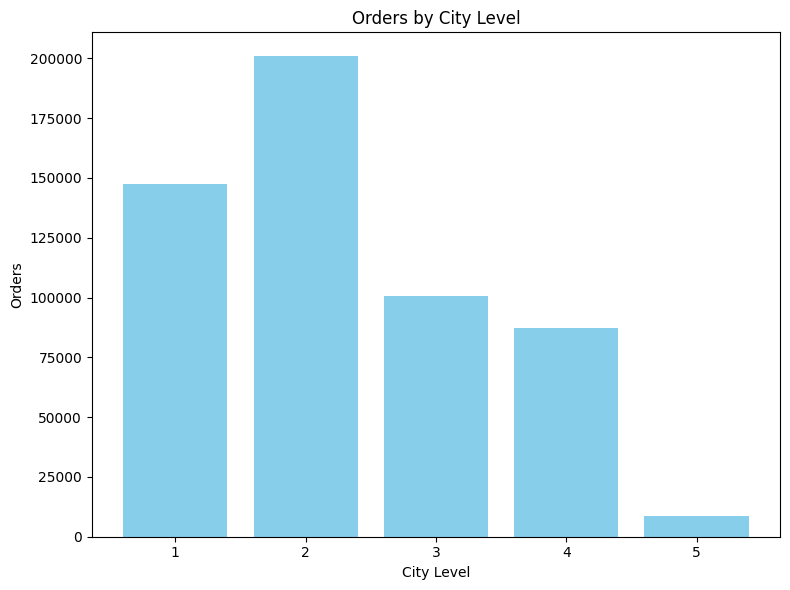

In [39]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(city_demand['city_level'], city_demand['quantity'], color='skyblue')

# Customize the plot
plt.xlabel('City Level')
plt.ylabel('Orders')
plt.title('Orders by City Level')
plt.tight_layout()

# Show the plot
plt.show()

## Regression Model

In [200]:
import pandas as pd
import statsmodels.api as sm
from datetime import datetime

# Assuming you have already loaded the 'order_march' DataFrame from the Excel file and converted 'order_date' to datetime format

# Group data by date and type and sum the quantities for each day and type
daily_demand = user_orders.groupby(['city_level', 'type', 'order_time', 'final_unit_price', 'original_unit_price', 'gender'])['quantity'].sum().reset_index()

# Create binary 'type_binary' variable (1 for type == 1, 0 for type == 2)
daily_demand['type_binary'] = (daily_demand['type'] == 1).astype(int)
daily_demand = daily_demand[daily_demand['city_level'] != -1]

# Get time of day
daily_demand['time_of_day'] = pd.to_datetime(daily_demand['order_time']).dt.strftime("%H").astype(int)

# Create binary 'gender_binary' variable (1 for type == 1, 0 for type == 2)
daily_demand['gender_binary'] = (daily_demand['gender'] == 'F').astype(int)



daily_demand

city_level  type             order_time  final_unit_price  \
101022           1   1.0  2018-03-01 00:00:16.0               9.9   
101023           1   1.0  2018-03-01 00:00:18.0              45.0   
101024           1   1.0  2018-03-01 00:00:22.0               3.5   
101025           1   1.0  2018-03-01 00:00:30.0               8.5   
101026           1   1.0  2018-03-01 00:00:35.0               0.0   
...            ...   ...                    ...               ...   
533528           5   2.0  2018-03-31 23:13:22.0              80.0   
533529           5   2.0  2018-03-31 23:19:23.0               0.0   
533530           5   2.0  2018-03-31 23:27:24.0              79.0   
533531           5   2.0  2018-03-31 23:41:27.0              54.0   
533532           5   2.0  2018-03-31 23:52:42.0              19.0   

        original_unit_price gender  quantity  type_binary  time_of_day  \
101022                162.9      F       1.0            1            0   
101023                 59.9      M       1.0            1            0   
101024                 78.0      M       1.0            1            0   
101025                 78.0      F       1.0            1            0   
101026                  0.0      F       2.0            1            0   
...                     ...    ...       ...          ...          ...   
533528                138.0      F       1.0            0           23   
533529                  0.0      M       1.0            0           23   
533530                198.0      F       1.0            0           23   
533531                159.0      F       1.0            0           23   
533532                 69.0      F       1.0            0           23   

        gender_binary  
101022              1  
101023              0  
101024              0  
101025              1  
101026              1  
...               ...  
533528              1  
533529              0  
533530              1  
533531              1  
533532              1  

[432511 rows x 10 columns]

In [201]:
# Separate independent variables (X) and dependent variable (y)
X = daily_demand[['city_level','type_binary', 'time_of_day', 'quantity', 'gender_binary']]
y = daily_demand['final_unit_price']

# 1. Create the LogisticRegression model object below and assign to variable 'model'

model = LinearRegression()

# 2. Fit the model to the training data below

model.fit(X, y)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 69.75221418027819
Coefficients: 
 [-2.14456845 23.7397571  -0.12249933 -2.51607686  2.58069801]
                                 OLS Regression Results                                
Dep. Variable:       final_unit_price   R-squared (uncentered):                   0.460
Model:                            OLS   Adj. R-squared (uncentered):              0.460
Method:                 Least Squares   F-statistic:                          7.382e+04
Date:                Sun, 23 Jul 2023   Prob (F-statistic):                        0.00
Time:                        12:50:21   Log-Likelihood:                     -2.5075e+06
No. Observations:              432511   AIC:                                  5.015e+06
Df Residuals:                  432506   BIC:                                  5.015e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
           

In [99]:
orders_data

user_ID      sku_ID  order_date             order_time  \
order_ID                                                                
d0cf5cc6db  0abe9ef2ce  581d5b54c1  2018-03-01  2018-03-01 17:14:25.0   
7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
...                ...         ...         ...                    ...   
3ad06b9fbe  a27b3ed4d4  a9109972d1  2018-03-31  2018-03-31 01:22:47.0   
c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
b9ad79338f  b5caf8a580  8dc4a01dec  2018-03-31  2018-03-31 13:31:01.0   
be3a9414b1  20ba6655f3  2dd6b818ec  2018-03-31  2018-03-31 12:51:18.0   
02d31f05c9  f260895cbe  10d369ef96  2018-03-31  2018-03-31 18:21:16.0   

            quantity  type promise  original_unit_price  final_unit_price  \
order_ID                                                                    
d0cf5cc6db         1     2       -                 89.0              79.0   
7444318d01         1     1       2                 99.9              53.9   
f973b01694         1     1       2                 78.0              58.5   
8c1cec8d4b         1     1       2                 61.0              35.0   
d43a33c38a         1     1       1                 78.0              53.0   
...              ...   ...     ...                  ...               ...   
3ad06b9fbe         1     2       -                  0.0              -1.0   
c9d77a7ed0         1     1       3                118.0              55.0   
b9ad79338f         1     1       2                 78.0              78.0   
be3a9414b1         1     2       -                189.0              78.0   
02d31f05c9         1     2       4                 68.0              49.0   

            direct_discount_per_unit  quantity_discount_per_unit  \
order_ID                                                           
d0cf5cc6db                       0.0                        10.0   
7444318d01                       5.0                        41.0   
f973b01694                      19.5                         0.0   
8c1cec8d4b                       0.0                        26.0   
d43a33c38a                      19.0                         0.0   
...                              ...                         ...   
3ad06b9fbe                       0.0                         0.0   
c9d77a7ed0                      63.0                         0.0   
b9ad79338f                       0.0                         0.0   
be3a9414b1                     111.0                         0.0   
02d31f05c9                      19.0                         0.0   

            bundle_discount_per_unit  coupon_discount_per_unit  gift_item  \
order_ID                                                                    
d0cf5cc6db                       0.0                       0.0          0   
7444318d01                       0.0                       0.0          0   
f973b01694                       0.0                       0.0          0   
8c1cec8d4b                       0.0                       0.0          0   
d43a33c38a                       0.0                       6.0          0   
...                              ...                       ...        ...   
3ad06b9fbe                       0.0                       1.0          1   
c9d77a7ed0                       0.0                       0.0          0   
b9ad79338f                       0.0                       0.0          0   
be3a9414b1                       0.0                       0.0          0   
02d31f05c9                       0.0                       0.0          0   

            dc_ori  dc_des  
order_ID                    
d0cf5cc6db       4      28  
7444318d01      28      28  
f973b01694      28      28  
8c1cec8d4b       4      28  
d4

In [106]:
delivery_orders = delivery_data.join(orders_data, on='order_ID', how='inner', lsuffix='_left', rsuffix='_right')

In [111]:
delivery_users = delivery_orders.join(users_data, on='user_ID', how='inner')

In [113]:
# Group data by date and sum the quantities for each day
delivery_users['time_of_day'] = pd.to_datetime(delivery_users['ship_out_time']).dt.strftime("%H")

# Group data by date and sum the quantities for each day
daily_demand = delivery_users.groupby('time_of_day')['quantity'].sum().reset_index()
daily_demand

time_of_day  quantity
0           00      1174
1           01      1886
2           02      1425
3           03       879
4           04       653
5           05       501
6           06      1311
7           07     10883
8           08     24454
9           09     26082
10          10     28849
11          11     25441
12          12      4684
13          13     30453
14          14     37331
15          15     34577
16          16     31275
17          17     22438
18          18     19545
19          19     17061
20          20     19165
21          21     18097
22          22     19090
23          23     15532

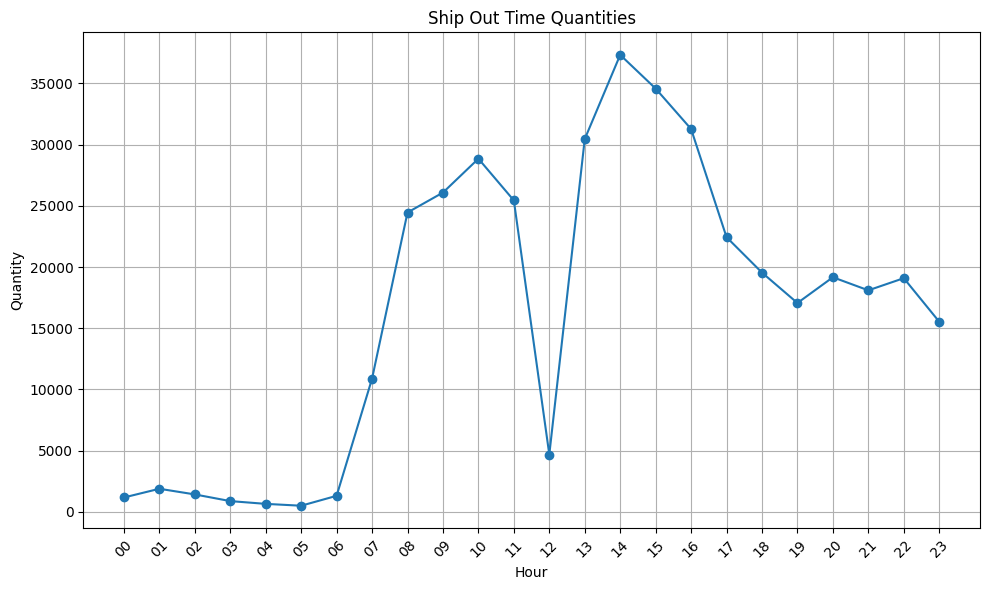

In [115]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(daily_demand['time_of_day'], daily_demand['quantity'], marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.title('Ship Out Time Quantities')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Regression (Vishal)

In [212]:
order_march.head()

order_ID     user_ID      sku_ID order_date          order_time  \
0  d0cf5cc6db  0abe9ef2ce  581d5b54c1 2018-03-01 2018-03-01 17:14:25   
1  7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
2  f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
3  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
4  d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   

   quantity  type promise  original_unit_price  final_unit_price  \
0         1     2       -                 89.0              79.0   
1         1     1       2                 99.9              53.9   
2         1     1       2                 78.0              58.5   
3         1     1       2                 61.0              35.0   
4         1     1       1                 78.0              53.0   

   direct_discount_per_unit  quantity_discount_per_unit  \
0                       0.0                        10.0   
1                       5.0                        41.0   
2                      19.5                         0.0   
3                       0.0                        26.0   
4                      19.0                         0.0   

   bundle_discount_per_unit  coupon_discount_per_unit  gift_item  dc_ori  \
0                       0.0                       0.0          0       4   
1                       0.0                       0.0          0      28   
2                       0.0                       0.0          0      28   
3                       0.0                       0.0          0       4   
4                       0.0                       6.0          0       3   

   dc_des time_of_day   weekend  
0      28          17  Thursday  
1      28          11  Thursday  
2      28          09  Thursday  
3      28          21  Thursday  
4      16          19  Thursday

In [257]:
order_march['sales'] = order_march['final_unit_price'] * order_march['quantity']
order_march[order_march['gift_item'] == 1]

order_ID     user_ID      sku_ID order_date          order_time  \
6       89286e5fd9  79154d0001  6717b7c979 2018-03-01 2018-03-01 22:18:41   
10      9c65b6264b  2021a86702  d3e31fdd6e 2018-03-01 2018-03-01 00:12:07   
23      8b71aa6716  9bb8b4c04f  a0e49f9966 2018-03-01 2018-03-01 22:08:44   
25      67b8f778f6  53dc20e68d  a0e49f9966 2018-03-01 2018-03-01 23:17:02   
26      67b8f778f6  53dc20e68d  c98d32ff09 2018-03-01 2018-03-01 23:17:02   
...            ...         ...         ...        ...                 ...   
549939  6d882e746d  227f7204e8  cfe58e6b7f 2018-03-31 2018-03-31 06:03:08   
549980  a7c31a6da3  ecc9f60096  a9109972d1 2018-03-31 2018-03-31 21:02:09   
549981  ac748a8701  dbbace058c  a9109972d1 2018-03-31 2018-03-31 11:30:16   
549983  9fa0694b3b  39933e9bc6  767ac490ed 2018-03-31 2018-03-31 19:51:43   
549984  3ad06b9fbe  a27b3ed4d4  a9109972d1 2018-03-31 2018-03-31 01:22:47   

        quantity  type promise  original_unit_price  final_unit_price  \
6              1     1       1                  0.0               0.0   
10             2     1       1                  0.0               0.0   
23             1     1       1                  0.0               0.0   
25             1     1       1                  0.0               0.0   
26             1     1       1                  0.0               0.0   
...          ...   ...     ...                  ...               ...   
549939         2     2       -                  0.0               0.0   
549980         1     2       -                  0.0              -3.0   
549981         1     2       -                  0.0               0.0   
549983         1     1       2                  0.0              -1.0   
549984         1     2       -                  0.0              -1.0   

        direct_discount_per_unit  quantity_discount_per_unit  \
6                            0.0                         0.0   
10                           0.0                         0.0   
23                           0.0                         0.0   
25                           0.0                         0.0   
26                           0.0                         0.0   
...                          ...                         ...   
549939                       0.0                         0.0   
549980                       0.0                         3.0   
549981                       0.0                         0.0   
549983                       0.0                         1.0   
549984                       0.0                         0.0   

        bundle_discount_per_unit  coupon_discount_per_unit  gift_item  dc_ori  \
6                            0.0                       0.0          1       3   
10                           0.0                       0.0          1       3   
23                           0.0                       0.0          1       3   
25                           0.0                       0.0          1       3   
26                           0.0                       0.0          1       3   
...                          ...                       ...        ...     ...   
549939                       0.0                       0.0          1       2   
549980                       0.0                       0.0          1       2   
549981                       0.0                       0.0          1       2   
549983                       0.0                       0.0          1       2   
549984                       0.0                       1.0          1       2   

        dc_des time_of_day   weekend  sales  
6           16          22  Thursday    0.0  
10          16          00  Thursday    0.0  
23          16          22  Thursday    0.0  
25          16          23  Thursday    0.0  
26          16          23  Thursday    0.0  
...        ...         ...       ...    ...  
549939       2          06  Saturday    0.0  
549980       2          21  Saturday   -3.0  
549981       2          11  Saturday    0.0  
549983

In [354]:
# Separate independent variables (X) and dependent variable (y)
X = order_march[['original_unit_price','direct_discount_per_unit', 'quantity_discount_per_unit', 'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item']]
y = order_march['sales']

# 1. Create the LogisticRegression model object below and assign to variable 'model'

model = LinearRegression()

# 2. Fit the model to the training data below

model.fit(X, y)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
# model = sm.OLS(y, X).fit()
# predictions = model.predict(X) 
r_sq = model.score(X, y)
r_sq

Intercept: 
 6.475224107866282
Coefficients: 
 [ 1.02909926 -0.96712709 -0.66437402 -0.95102987 -1.14358857 -6.60392218]


0.1344072543709477

## Top 5 Products Price Optimization

In [312]:
top_5 = order_march.groupby('sku_ID')[['quantity', 'original_unit_price','direct_discount_per_unit', 'quantity_discount_per_unit', 'bundle_discount_per_unit', 'coupon_discount_per_unit']].sum().reset_index().sort_values('quantity', ascending=False).head()
top_5

sku_ID  quantity  original_unit_price  direct_discount_per_unit  \
344   068f4481b3     25769           7029209.73                 1629817.0   
6060  a9109972d1     18336                 0.00                       0.0   
2308  3c79df1d80     16431            863201.06                  225773.8   
3616  623d0a582a     13474            792347.74                  178385.0   
5117  8dc4a01dec     13361            760222.30                   92472.6   

      quantity_discount_per_unit  bundle_discount_per_unit  \
344                     0.000000                  154865.7   
6060                10268.652859                       0.0   
2308                    0.000000                       0.0   
3616                 4975.383333                   19411.0   
5117                18090.928431                    9657.0   

      coupon_discount_per_unit  
344               82510.344639  
6060               3022.970007  
2308              11228.100000  
3616             145515.900000  
5117              18344.769532

In [293]:
top_5_sales = order_march[order_march['sku_ID'] == '068f4481b3']
top_5_sales

order_ID     user_ID      sku_ID order_date          order_time  \
9       9c65b6264b  2021a86702  068f4481b3 2018-03-01 2018-03-01 00:12:07   
34      4d91f1ff1a  3f399e9323  068f4481b3 2018-03-01 2018-03-01 23:10:35   
78      eda921b8b8  f83141d477  068f4481b3 2018-03-01 2018-03-01 17:27:37   
83      1e33a39ac5  28ac8c9203  068f4481b3 2018-03-01 2018-03-01 18:41:14   
98      ea6dd245e3  12f610851e  068f4481b3 2018-03-01 2018-03-01 23:14:42   
...            ...         ...         ...        ...                 ...   
549942  fa16ed0618  0d2bfbc1d1  068f4481b3 2018-03-31 2018-03-31 09:16:25   
549947  214f961263  0fa9d963c8  068f4481b3 2018-03-31 2018-03-31 15:13:34   
549952  ca62ad9b8a  936e165e9d  068f4481b3 2018-03-31 2018-03-31 11:06:24   
549957  64ece0a3a2  c1c8327987  068f4481b3 2018-03-31 2018-03-31 11:05:03   
549966  80915573ca  256f3c1255  068f4481b3 2018-03-31 2018-03-31 15:29:46   

        quantity  type promise  original_unit_price  final_unit_price  \
9              1     1       1                298.0             208.0   
34             1     1       2                298.0             208.0   
78             1     1       2                298.0             198.0   
83             1     1       2                298.0             208.0   
98             1     1       1                298.0             198.0   
...          ...   ...     ...                  ...               ...   
549942         1     1       1                298.0             220.0   
549947         1     1       1                298.0             228.0   
549952         1     1       1                298.0             228.0   
549957         1     1       1                208.0             208.0   
549966         1     1       1                298.0             228.0   

        direct_discount_per_unit  quantity_discount_per_unit  \
9                           90.0                         0.0   
34                          90.0                         0.0   
78                          90.0                         0.0   
83                          90.0                         0.0   
98                          90.0                         0.0   
...                          ...                         ...   
549942                      70.0                         0.0   
549947                      70.0                         0.0   
549952                      70.0                         0.0   
549957                       0.0                         0.0   
549966                      70.0                         0.0   

        bundle_discount_per_unit  coupon_discount_per_unit  gift_item  dc_ori  \
9                            0.0                       0.0          0       3   
34                           0.0                       0.0          0      28   
78                           0.0                      10.0          0       3   
83                           0.0                       0.0          0       3   
98                           0.0                      10.0          0      28   
...                          ...                       ...        ...     ...   
549942                       0.0                       8.0          0       2   
549947                       0.0                       0.0          0       2   
549952                       0.0                       0.0          0       2   
549957                       0.0                       0.0          0       2   
549966                       0.0                       0.0          0       2   

        dc_des time_of_day   weekend  sales  
9           16          00  Thursday  208.0  
34          28          23  Thursday  208.0  
78           3          17  Thursday  198.0  
83           3          18  Thursday  208.0  
98          28          23  Thursday  198.0  
...        ...         ...       ...    ...  
549942       2          09  Saturday  220.0  
549947       2          15  Saturday  228.0  
549952       2          11  Saturday  228.0  
549957

In [355]:
# Separate independent variables (X) and dependent variable (y)
X = top_5[['original_unit_price','direct_discount_per_unit', 'quantity_discount_per_unit', 'bundle_discount_per_unit']]
y = top_5['quantity']

# 1. Create the LogisticRegression model object below and assign to variable 'model'

model = LinearRegression()

# 2. Fit the model to the training data below

model.fit(X, y)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
 
r_sq = model.score(X, y)
r_sq

Intercept: 
 7240.484767448139
Coefficients: 
 [-0.03981264  0.19292242  1.08052296 -0.10362741]


1.0

In [384]:
x = [9.99, 39, 24, 0, 1, 0]
price = 9.99
def LinDemandForecast(price):
    # apply regression coefficients to calculate and return demand forecast
    return 9.20 \
            - 0.01*price             \
            + 60.17*(1-price/x[1])   \
            - 0.19*x[2]              \
            + 2.83*x[3]              \
            + 3.38*x[4]              \
            + 3.59*x[5] 

# define negative of the revenue and profit since the available optimization function is a minimize() function 
# so we will convert the maximization problem into a minimization problem
def NegRevenue(price):
    return -LinDemandForecast(price)*price


In [386]:
import math
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

# Call the minimize function in SciPy library to maximize revenue as a function of price
res = minimize(NegRevenue, price, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

# Print the maximum value of revenue and the corresponding optimal price
print('Maximum Revenue:', -res.fun)
print('Optimal Price that maximizes revenue:', res.x)
print('Demand Forecast for the Optimal Price:', MultDemandForecast(res.x))
print('Corresponding Profit:', -NegProfit(res.x))

Optimization terminated successfully.
         Current function value: -748.617767
         Iterations: 34
         Function evaluations: 70
Maximum Revenue: 748.6177670904889
Optimal Price that maximizes revenue: [21.95681977]
Demand Forecast for the Optimal Price: 9.2


NameError: name 'NegProfit' is not defined

## Price Optimization Pt 2

In [341]:
# Create binary 'gender_binary' variable (1 for type == 1, 0 for type == 2)
user_orders['gender_binary'] = (user_orders['gender'] == 'F').astype(int)

# Group data by date and type and sum the quantities for each day and type
price_quantity = user_orders.groupby(['education', 'gender_binary'])['quantity'].sum().reset_index()
price_quantity

education  gender_binary  quantity
0         -1              0   97396.0
1         -1              1   64076.0
2          1              0    3529.0
3          1              1    9400.0
4          2              0   28921.0
5          2              1   71387.0
6          3              0   80294.0
7          3              1  237502.0
8          4              0   31371.0
9          4              1   45279.0

In [322]:
top_5_sales = daily_demand[daily_demand['sku_ID'] == '068f4481b3']
top_5_sales.

education      sku_ID  city_level  type             order_time  \
4694           -1  068f4481b3           1   1.0  2018-03-01 08:46:54.0   
4695           -1  068f4481b3           1   1.0  2018-03-01 11:24:42.0   
4696           -1  068f4481b3           1   1.0  2018-03-01 11:36:43.0   
4697           -1  068f4481b3           1   1.0  2018-03-01 11:56:34.0   
4698           -1  068f4481b3           1   1.0  2018-03-01 12:10:58.0   
...           ...         ...         ...   ...                    ...   
491624          4  068f4481b3           5   1.0  2018-03-29 19:44:05.0   
491625          4  068f4481b3           5   1.0  2018-03-30 00:07:31.0   
491626          4  068f4481b3           5   1.0  2018-03-30 09:35:29.0   
491627          4  068f4481b3           5   1.0  2018-03-31 01:45:11.0   
491628          4  068f4481b3           5   1.0  2018-03-31 10:12:59.0   

        final_unit_price  original_unit_price gender  quantity  type_binary  \
4694               208.0                298.0      F       1.0            1   
4695               201.0                298.0      F       1.0            1   
4696               208.0                298.0      M       1.0            1   
4697               208.0                298.0      F       1.0            1   
4698               202.0                298.0      F       1.0            1   
...                  ...                  ...    ...       ...          ...   
491624             208.0                298.0      F       1.0            1   
491625             228.0                298.0      M       1.0            1   
491626             208.0                298.0      F       1.0            1   
491627             216.0                298.0      F       1.0            1   
491628             208.0                298.0      F       1.0            1   

        time_of_day  gender_binary  
4694              8              1  
4695             11              1  
4696             11              0  
4697             11              1  
4698             12              1  
...             ...            ...  
491624           19              1  
491625            0              0  
491626            9              1  
491627            1              1  
491628           10              1  

[20551 rows x 12 columns]

In [342]:
# Separate independent variables (X) and dependent variable (y)
X = price_quantity[['education', 'gender_binary']]
y = price_quantity['quantity']

# 1. Create the LogisticRegression model object below and assign to variable 'model'

model = LinearRegression()

# 2. Fit the model to the training data below

model.fit(X, y)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 41760.05135135136
Coefficients: 
 [ 3634.52702703 37226.6       ]
                                 OLS Regression Results                                
Dep. Variable:               quantity   R-squared (uncentered):                   0.503
Model:                            OLS   Adj. R-squared (uncentered):              0.379
Method:                 Least Squares   F-statistic:                              4.045
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                      0.0611
Time:                        11:41:43   Log-Likelihood:                         -125.04
No. Observations:                  10   AIC:                                      254.1
Df Residuals:                       8   BIC:                                      254.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err      

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
